In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Reading the dataset from a CSV file named samples.csv using Pandas.

In [5]:
data = pd.read_csv('samples.csv')
data.head()

,X,Y
0,49,37.75
1,101,71.75
2,134,94.75
3,183,116.75
4,225,141.75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       7 non-null      int64  
 1   Y       7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 244.0 bytes


In [7]:
X = data['X']
Y = data['Y']

padding = 0.1  # 10% padding
x_max = max(X) * (1 + padding)
y_max = max(Y) * (1 + padding)
x_min = min(X) * (1 - padding)
y_min = min(Y) * (1 - padding)

# Ensure minimum values don't go below 0 if data is all positive
# x_min = max(0, x_min)
 #y_min = max(0, y_min)

Creating a scatter plot to visualize the relationship between Years of Experience and Salary (in thousands).

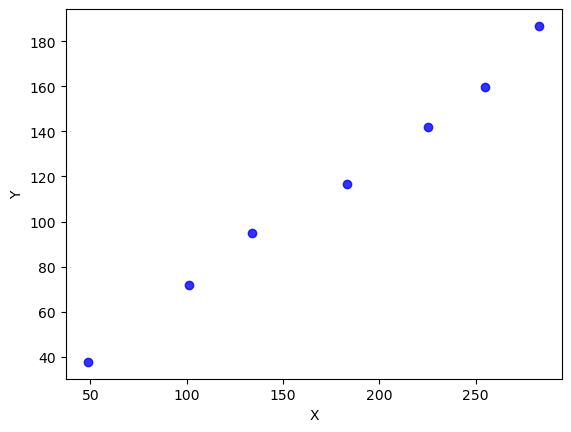

In [13]:
plt.scatter(x=X, y=Y, c='blue', alpha=0.8, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim()
plt.ylim()
plt.show()

In [9]:
m = X.shape[0]

In [10]:
# Define the range for w and b
w_range = np.linspace(-1e4, 1e4, 200)
b_range = np.linspace(-1e4, 1e4, 200)
W, B = np.meshgrid(w_range, b_range)

# Calculate the cost function for each combination of w and b
J_values = np.zeros((w_range.shape[0], b_range.shape[0]))
for i in range(len(w_range)):
    for j in range(len(b_range)):
        w = w_range[i]
        b = b_range[j]
        Yhat = w * X + b
        J_values[i, j] = 1 / (2 * m) * np.sum((Yhat - Y) ** 2)

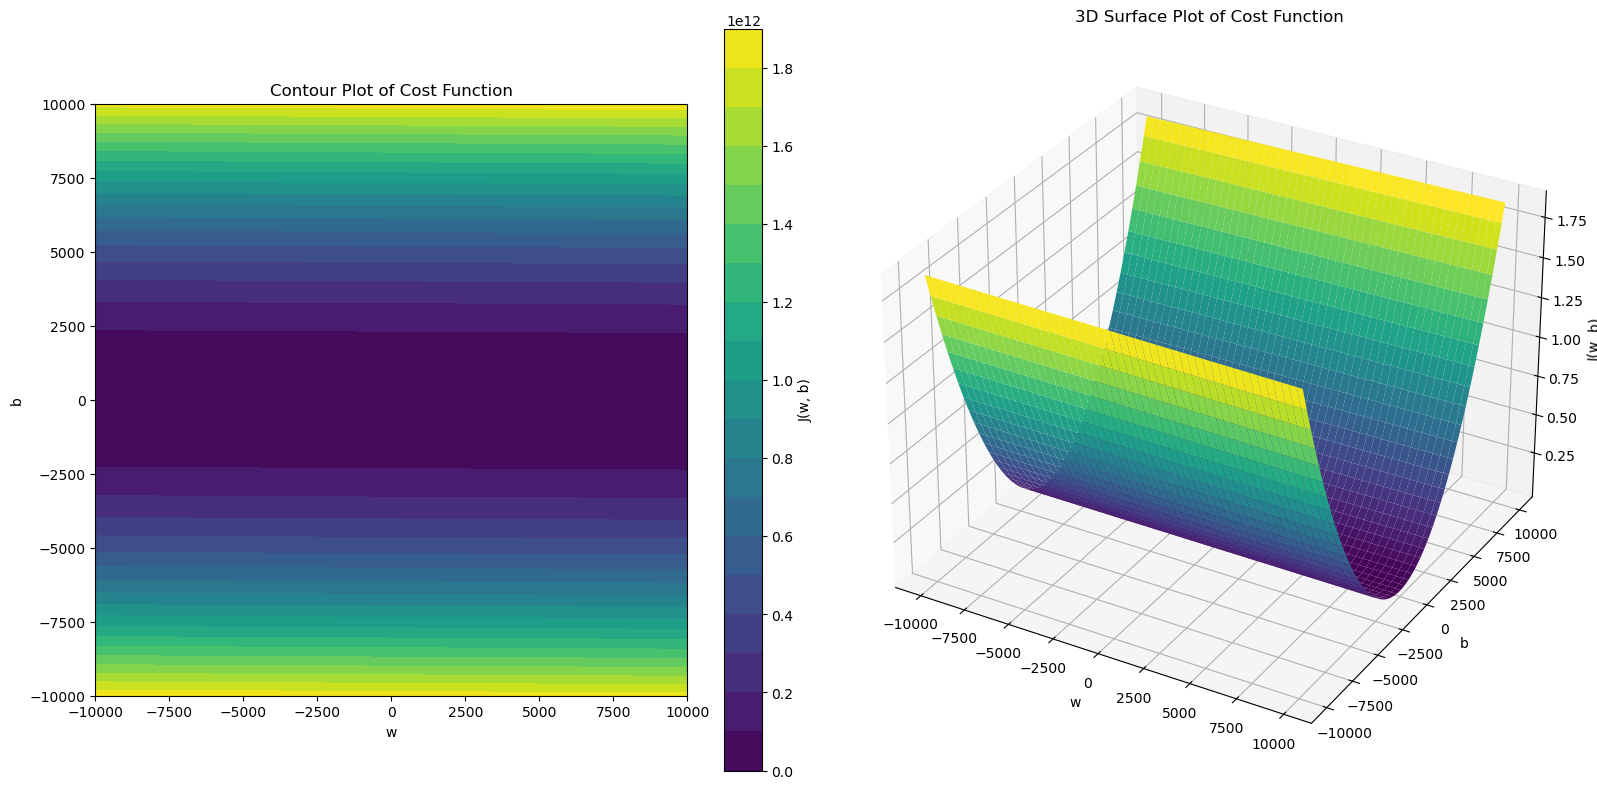

In [11]:
# Create a figure with subplots
fig = plt.figure(figsize=(16, 8))

# Contour Plot
ax1 = fig.add_subplot(121)  # 1 row, 2 columns, 1st subplot
contour = ax1.contourf(W, B, J_values, levels=20, cmap='viridis')
ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_title('Contour Plot of Cost Function')
plt.colorbar(contour, ax=ax1, label='J(w, b)')
ax1.set_aspect('equal', adjustable='box')

# 3D Surface Plot
ax2 = fig.add_subplot(122, projection='3d')  # 1 row, 2 columns, 2nd subplot
ax2.plot_surface(W, B, J_values, cmap='viridis', edgecolor='none')
ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.set_zlabel('J(w, b)')
ax2.set_title('3D Surface Plot of Cost Function')

plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

In [26]:
def plot_regression_line(w, b):
    Xhat = np.linspace(1.5 * min(-x_max, x_min), 1.5 * max(x_max, -x_min), 100)
    Yhat = w * Xhat + b
    j = 1 / (2 * m) * np.sum((w * X + b - Y) ** 2)
    print(f"The value of J for w = {w:.2f} and b = {b:.2f} is: {j:.2f}")

    # Plot the line on the scatter plot
    plt.scatter(x=X, y=Y, c='blue', alpha=0.8, marker='o')
    # Plot the reggression line
    plt.plot(Xhat, Yhat, color='red', label=f'y = {w:.2f}x + {b:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([x_min * 0.2, x_max])
    plt.ylim([y_min * 0.2, y_max])
    plt.legend()
    plt.show()

We prompt the user to enter values for the weight (`w`) and bias (`b`). These values are then passed to the function `plot_regression_line(w, b)`, which will plot the regression line based on the provided parameters.

In [ ]:
w = float(input("Enter the value of w: "))
b = float(input("Enter the value of b: "))
plot_regression_line(w, b)

In [16]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost_function, gradient_function):
    w = w_init
    b = b_init
    J_hist = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = cost_function(x, y, w, b)

        if i % 100 == 0:
            print(f"Iteration {i:4}: Cost {J:0.2e} ",
          f"w: {w: 0.3e}, b: {b: 0.3e}")

        J_hist.append(J)
        if i > 0 and J_hist[i] <= 1e-3:
            print("stop")
            break

    w_final = w
    b_final = b
    return w_final, b_final, J_hist

In [17]:
def gradient_function(x, y, w, b):
    m = x.shape[0]
    Yhat = w * x + b
    dj_dw = (1 / m) * np.sum((Yhat - y) * x)
    dj_db = (1 / m) * np.sum(Yhat - y)

    return dj_dw, dj_db

In [18]:
def cost_function(x, y , w, b):
    Yhat = w * x + b
    return 1 / (2 * m) * np.sum((Yhat - y) ** 2)

Standardizing features can help gradient descent converge faster because it ensures that all features contribute equally to the distance calculations. For simpler calculations, we will only use standard deviation to scale down the sample values.

In [20]:
Xstd = np.std(X, axis=0)     
Ystd = np.std(X, axis=0) 

# Standardize the features
X_standardized = X / Xstd
Y_standardized = Y / Ystd

Start by initializing the weight (`w`) and bias (`b`) parameters to 0. We then set the number of iterations and the learning rate for our gradient descent algorithm. Using these parameters along with our custom `cost_function` and `gradient_function`, the `gradient_descent` function minimizes the cost function. It returns the final values of `w` and `b`, along with the history of the cost function values over the iterations. Finally, we plot the cost history to observe how the cost decreases over time.

Iteration    0: Cost 5.48e-01  w:  1.931e-01, b:  7.319e-02
Iteration  100: Cost 1.34e-03  w:  5.873e-01, b:  1.643e-01
Iteration  200: Cost 1.19e-03  w:  5.969e-01, b:  1.392e-01
Iteration  300: Cost 1.16e-03  w:  6.015e-01, b:  1.273e-01
Iteration  400: Cost 1.15e-03  w:  6.037e-01, b:  1.215e-01
Iteration  500: Cost 1.15e-03  w:  6.047e-01, b:  1.188e-01
Iteration  600: Cost 1.15e-03  w:  6.052e-01, b:  1.175e-01
Iteration  700: Cost 1.15e-03  w:  6.054e-01, b:  1.169e-01
Iteration  800: Cost 1.15e-03  w:  6.056e-01, b:  1.166e-01
Iteration  900: Cost 1.15e-03  w:  6.056e-01, b:  1.164e-01


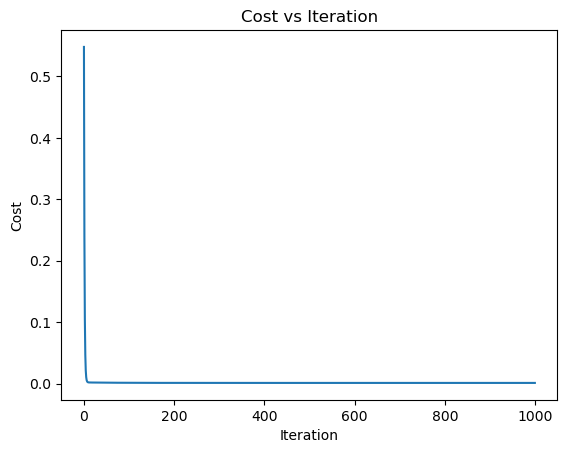

In [21]:
w_init = 0
b_init = 0
num_iters = 1000
alpha = 0.05
w_final, b_final, J_hist = gradient_descent(X_standardized, Y_standardized, w_init, b_init, alpha, num_iters, cost_function, gradient_function)
plt.plot(J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

After performing gradient descent and obtaining the optimal values for the weight (`w_final`) and bias (`b_final`), we can visualize the final regression line. However, since these coefficients are derived from the standardized data, we need to apply an inverse transformation to interpret them in the context of the original data. This will allow us to accurately assess the model's performance and make predictions based on the original scale of the features and target variable.

The value of J for w = 0.61 and b = 9.19 is: 7.15


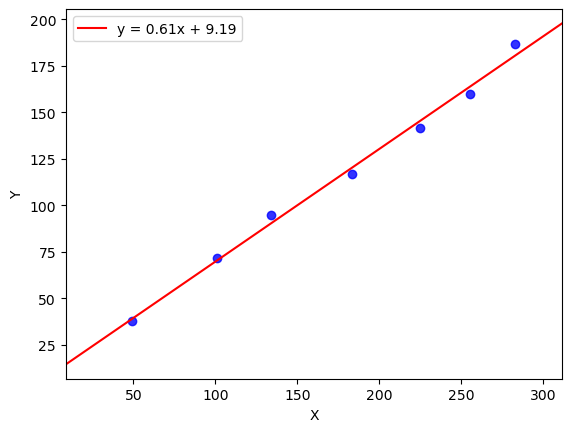

In [27]:
plot_regression_line(Ystd * w_final / Xstd, Ystd * b_final)